<title> Data Analysis on Global Terrorism Dataset</title>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import  plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected+pdf"

# About Data

The Data is available at https://www.start.umd.edu/gtd/ anyone can obtain it by just filling a small form , The timeframe of the whole dataset is 1970 to June 2021, There are 135 columns/features of every associated incident uniquely identified by eventid, We will go through this data using python and try to find some insights about the terrorists attacks over the decades in the whole world.

Explanation of selected columns:

iyear - Year in which attack was done\
success - Success of a terrorist strike\
suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide\
attacktype1 - The general method of attack\
attacktype1_txt - The general method of attack and broad class of tactics used.\
weaptype1_txt - General type of weapon used in the incident\
weapsubtype1_txt - More specific value for most of the Weapon Types\
nkill - The number of total confirmed fatalities for the incident\

Data is divided in two excel sheets, one for data from 1970 to 2020 and the other sheet contains data from Jan 2021 to June 2021, Going forward to easily plot graphs from the dataframe I will concatenate the two files in a single dataframe.

In [2]:
# loading excel sheet from 1970 to 2020
df = pd.read_excel("globalterrorismdb_0522dist.xlsx")

# loading excel sheet for 2021
df21 = pd.read_excel("globalterrorismdb_2021Jan-June_1222dist.xlsx")

# Creating a single dataframe from both the dataset
df = pd.concat([df,df21])

There are total of 214666 attacks over 40 years, which means **5366.65** attacks every year on average. A whooping **14** Terrorist attacks per day around the globe.

In [3]:
print("Dataframe Info")
df.info()

Dataframe Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214666 entries, 0 to 4959
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 222.7+ MB


There are null values present in multiple rows for 94 columns, to select a subset of this dataset I will drop the columns that have null value more than 5% of the rows. 

In [4]:
print(" These are the columns that have null value less than 5% ")
print(list(df.isnull().sum()[(df.isnull().sum() / df.shape[0] * 100) < 5].index))

 These are the columns that have null value less than 5% 
['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


I will add 'nkill' to the dataset as well to analyse some columns relationship to the number of deaths due to these attacks.

In [5]:
column_to_analyse = df.isnull().sum()[(df.isnull().sum() / df.shape[0] * 100) < 5].index.to_list()
column_to_analyse.append('nkill')
df = df[column_to_analyse]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214666 entries, 0 to 4959
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          214666 non-null  int64  
 1   iyear            214666 non-null  int64  
 2   imonth           214666 non-null  int64  
 3   iday             214666 non-null  int64  
 4   extended         214666 non-null  int64  
 5   country          214666 non-null  int64  
 6   country_txt      214666 non-null  object 
 7   region           214666 non-null  int64  
 8   region_txt       214666 non-null  object 
 9   provstate        214666 non-null  object 
 10  city             214240 non-null  object 
 11  latitude         209940 non-null  float64
 12  longitude        209939 non-null  float64
 13  specificity      214665 non-null  float64
 14  vicinity         214666 non-null  int64  
 15  crit1            214666 non-null  int64  
 16  crit2            214666 non-null  int64 

Ahh! A little relief for RAM and CPU 😮‍💨. Now we are left with 41 columns and the column year of all the events can help us identify various trends of the terrorists activities around the globe every year.

# Yearly trend of attacks across the Globe

In [21]:
yearly_attacks = df.groupby(["iyear"]).agg(total_attacks=('eventid','count'))
fig = px.area(data_frame=yearly_attacks,x = yearly_attacks.index,y = yearly_attacks['total_attacks'],template='plotly_dark')
fig.update_traces(line_color = 'red',line_width = 5)
fig.update_layout(title = 'Yearly trend of total Terrorist Attack Over the Word')
fig.show()

The maximum number of attacks was in the year 2014 with total of 16.96 thousands.\
The least number of attacks was in the year 1970 with total of 651 hundred.\
The number of attacks have decreased after 2014 by 75.88% till 2021

## How the yearly trend differs in different region for the number of attacks

In [22]:
yearly_event_region = df.groupby(['iyear','region_txt'])['eventid'].agg(no_of_attacks = ('count')).reset_index()
fig = px.line(data_frame = yearly_event_region,x = 'iyear' ,y = yearly_event_region.columns[2],color='region_txt',template='plotly_dark')
fig.update_layout(title = "Do all the region follow same global trend of being hit")
fig.show()

#### These regions don't follow the usual global trend 
    Australasia & Ocenia
    Central America and Caribbean
    East Asia
    North America
    South America
    Western Europe
    Central Asia

# Any trends by Months or Days?

In [23]:
monthly_attacks = df.groupby(["imonth"]).agg(total_attacks=('eventid','count')).reset_index()
monthly_attacks.index = monthly_attacks.index.map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})
fig = px.bar(data_frame=monthly_attacks,x = monthly_attacks.index,y = monthly_attacks['total_attacks'],color_discrete_sequence=['darkred'],template='plotly_dark')
fig.update_layout(title = 'Do Terrorist perfer certain months or do they take vacations?')
fig.show()

In [24]:
daily_attacks = df.groupby(["iday"]).agg(total_attacks=('eventid','count'))
fig = px.bar(data_frame=daily_attacks,x = daily_attacks.index,y = daily_attacks['total_attacks'],color_discrete_sequence=['darkred'],template='plotly_dark')
fig.update_layout(title = 'Do they have some prefered Day?')
fig.show()

There is no prefrences of day or months shown in terrorist attacks.

The Reason why we have 0 as day : `For attacks that took place between 1970 and 2011, if the exact day of the event is unknown, this is recorded as “0.”`


# Have we been able to fights these attacks?

In [25]:
yearly_success_rate = df.groupby('iyear')['success'].agg(total_sucess = ('sum'),total_event = 'count')
yearly_success_rate['sucess rate'] = round((yearly_success_rate['total_sucess'] / yearly_success_rate['total_event'])*100,2)
fig = px.scatter(data_frame=yearly_success_rate,x = yearly_success_rate.index,y = 'sucess rate',color='sucess rate',color_continuous_scale=['yellow','orange','red'],template='plotly_dark',size = 'total_event')
fig.update_layout(title = "What % of attacks have been successfull")
fig.show()

With the decrease in success rate over time the number of attacks have increased.\
All time lowest percentage of success rate was in year 2017 with 79.36% of attacks being successfull.\
When compared the number of attacks from 2017 to 1972 it has increased by 95%.

# Suicidal Attacks 

In [26]:
yearly_suicide_rate = df.groupby('iyear')['suicide'].agg(suicide_count= ('sum'),event_count = ('count'))
yearly_suicide_rate['suicide rate'] = round((yearly_suicide_rate['suicide_count'] / yearly_suicide_rate['event_count']) * 100,2)
fig = px.area(data_frame = yearly_suicide_rate,x = yearly_suicide_rate.index,y = yearly_suicide_rate['suicide rate'],template='plotly_dark')
fig.update_traces(line_color = 'green',line_width = 5)
fig.update_layout(title = "What is the percentage of Suicide attacks?")
fig.show()

By 1980 there were no Suicidal attacks and has increased rapidly since 2000.\
Suicidal attacks have decreased in percentage since 2017.\
In 2021 June the Suicidal attacks are 1.79% of the total attacks which is a decrease since 201

# Relation between no. of events and no. of deaths

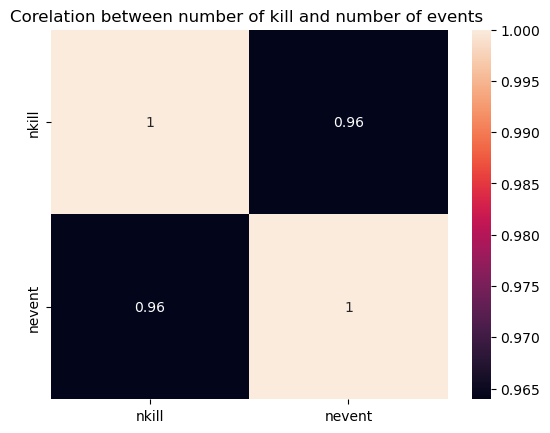

In [27]:
yearly_casualties = df.groupby('iyear')['nkill'].agg(nkill = ('sum'),nevent=('count'))
sns.heatmap(yearly_casualties.corr(),annot = True)
plt.title('Corelation between number of kill and number of events ')
plt.show()

In [28]:
fig = px.scatter(data_frame= yearly_casualties,x = 'nkill',y = 'nevent',size = 'nkill',template = 'plotly_dark',color='nkill',color_continuous_scale = ['yellow','orange','red'])
fig.update_layout(title = 'Num of incident vs Num of Deaths')
fig.show()

The number of kills is highly correlated with the number of attacks.\
This two variables show a nearly perfect linear relationship.

# What various types of attacks are being used over the years.

In [29]:
attacktype = df.groupby(['iyear','attacktype1_txt'])['attacktype1_txt'].agg(attack_type_count = 'count').reset_index()
attacktype = attacktype.rename(columns={'iyear':'year','attacktype1_txt' : 'attack_type'})
fig = px.bar(data_frame=attacktype,x = 'attack_type',y = 'attack_type_count',animation_frame='year',color = 'attack_type',template = 'plotly_dark')
fig.update_layout(title = 'Yearly Count of Attack types',height = 700)
fig.show()

# What is the most used attack type

In [30]:
attacktype_region = df.groupby(['iyear','region_txt','attacktype1_txt'])['eventid'].agg(count_attack = 'count').reset_index()
fig = px.pie(data_frame=attacktype_region,names = 'attacktype1_txt',values='count_attack',template = 'plotly_dark',hole = 0.5)
fig.update_layout(title = 'Most popular attack type')
fig.show()

Bomb Explosions is the most used attack type.\
23.7% of the attacks are of Armed Assault type.\
Least Used method is Hijacking 0.36% of all the attacks.

# What kind of Weapons are used for these attacks.

In [53]:
weapons = df.groupby('weaptype1_txt')[['nkill','eventid']].agg(nkill_by_weapon = ('nkill','sum'),count_of_attacks_used_weapon = ('eventid','count')).reset_index()
weapons.loc[weapons.weaptype1_txt.str.startswith("Vehicle"),"weaptype1_txt"] = "Vehicle"
fig = make_subplots(rows=1,cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
                     labels=weapons['weaptype1_txt'],values=weapons['nkill_by_weapon']),
                     row = 1,col = 1)

fig.add_trace(go.Pie(
                     labels=weapons['weaptype1_txt'],values=weapons['count_of_attacks_used_weapon']),
                     row = 1,col = 2)
fig.update_traces(hole = 0.4)


fig.update_layout(template = 'plotly_dark',title = "Number of Kills and Count of Usage for weapon types",annotations=[dict(text='N kill', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Count', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

Firearms are used in 34.6% of the attacks and still has caused 42.6% deaths of the total casaulties.\
Friearms are more lethal than Explosives.\
Radiological have the least percentage of deaths and as also been used the least amount of time.

# Map time 😃

In [33]:
iso_alpha = pd.read_csv('wikipedia-iso-country-codes.csv')[['Alpha-3 code','English short name lower case']]
iso_alpha = iso_alpha.rename(columns = {'English short name lower case' : 'country_txt'})
contry_wise_kill_count = df.groupby('country_txt')['nkill'].agg('count').to_frame().reset_index()
contry_wise_kill_count = contry_wise_kill_count.merge(iso_alpha,on = 'country_txt')

In [34]:
fig = px.choropleth(contry_wise_kill_count, locations="Alpha-3 code",
                    hover_name="country_txt", # column to add to hover information
                    color = 'nkill',
                    color_continuous_scale= 'sunsetdark',
                    template='plotly_dark',height=800)
fig.update_layout(title = 'No. of Deaths per Country')
fig.show()

😢\
The most casualties of terrorsim are in Iraq, followed by Afghanistan,Pakistan and India.\
Columbia has the highest casualties from the American Continents followed by Peru.\
Turkmenistan has the least number of deaths only 2.
